# Face Classification using Convolutional Neural Networks

This Jupyter notebook demonstrates a simple face classification model using Convolutional Neural Networks (CNNs). The model is trained on a dataset of face images, and it is designed to classify these images into two categories.

## Table of Contents

1. [Import Libraries](#import-libraries)
2. [Load and Preprocess Data](#load-and-preprocess-data)
3. [Split Data into Training and Testing Sets](#split-data-into-training-and-testing-sets)
4. [Define the CNN Model](#define-the-cnn-model)
5. [Compile the Model](#compile-the-model)
6. [Train the Model](#train-the-model)
7. [Evaluate the Model](#evaluate-the-model)
8. [Save the Model](#save-the-model)

## Import Libraries

The necessary libraries are imported at the beginning of the notebook. These include NumPy for numerical operations, OpenCV for image processing, TensorFlow for building and training the CNN model, and scikit-learn for data preprocessing and splitting.

```python
import numpy as np
import cv2
from tensorflow.keras import layers, models
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
```

## Load and Preprocess Data

The code loads face images from a specified directory and preprocesses them. The images are resized to 32x32 pixels, normalized by dividing by 255, and their corresponding labels are extracted from the directory structure.

```python
all_images = []
all_labels = []

for i, item in enumerate(glob.glob('faces/**')):
    img = cv2.imread(item)
    img = cv2.resize(img, (32, 32))
    all_images.append(img)
    all_labels.append(item.split('\\')[-2])
    if i % 1000 == 0:
        print('INFO: {} images have been loaded'.format(i))
```

## Split Data into Training and Testing Sets

The dataset is split into training and testing sets using the `train_test_split` function from scikit-learn. The labels are encoded using `LabelEncoder` and then converted to categorical format using `to_categorical`.

```python
le = LabelEncoder()
all_labels = le.fit_transform(all_labels)
all_labels = to_categorical(all_labels)

all_images = np.array(all_images) / 255

x_train, x_test, y_train, y_test = train_test_split(all_images, all_labels, train_size=0.8, random_state=42)
```

## Define the CNN Model

The CNN model is defined using the Sequential API from TensorFlow. It consists of several convolutional layers, batch normalization layers, a flatten layer, and dense layers. The output layer uses the softmax activation function for multi-class classification.

```python
net = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(2, activation='softmax')
])
```

## Compile the Model

The model is compiled with the ADAM optimizer, categorical cross-entropy loss function, and accuracy metric.

```python
net.compile(optimizer='ADAM', metrics='accuracy', loss='categorical_crossentropy')
```

## Train the Model

The model is trained on the training data for 10 epochs using a batch size of 16. The validation data is also provided for evaluation during training.

```python
H = net.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, epochs=10)
```

## Evaluate the Model

The model's performance is evaluated by plotting the training and validation accuracy and loss over the epochs.

```python
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(H.history['accuracy'], label='train_accuracy')
plt.plot(H.history['val_accuracy'], label='val_accuracy')
plt.plot(H.history['loss'], label='train_loss')
plt.plot(H.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('')
plt.title('Classification')
plt.legend(loc='upper left')
plt.show()
```

## Save the Model

The trained model is saved to a file named 'smile_net.h5' for future use.

```python
net.save('smile_net.h5')
```

In [1]:
import numpy as np
import cv2 
from tensorflow.keras import layers , models
import glob 
all_images = []
all_labels = []

In [ ]:
for i,item in enumerate(glob.glob('faces\*\*')):
    img=cv2.imread(item)
    img=cv2.resize(img,(32,32))
    all_images.append(img)
    all_labels.append(item.split('\\')[-2])
    if i%1000==0:
        print('INFO:{} images has been loaded'.format(i))

    

INFO:0 images has been loaded
INFO:1000 images has been loaded
INFO:2000 images has been loaded
INFO:3000 images has been loaded


In [4]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
all_labels=le.fit_transform(all_labels)
all_labels=to_categorical(all_labels)

all_images=np.array(all_images)/255

x_train,x_test,y_train,y_test = train_test_split(all_images,all_labels,train_size=0.8,random_state=42)




In [5]:
net=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.BatchNormalization(), 
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(2,activation='softmax')   

])

In [7]:
net.compile(optimizer='ADAM',metrics='accuracy',loss='categorical_crossentropy')

In [9]:
H=net.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=16,epochs=10)

Epoch 1/10
200/200 [==============================] - 36s 176ms/step - loss: 1.3052 - accuracy: 0.7534 - val_loss: 7.7921 - val_accuracy: 0.5388
Epoch 2/10
200/200 [==============================] - 32s 160ms/step - loss: 0.2590 - accuracy: 0.8944 - val_loss: 0.9559 - val_accuracy: 0.7619
Epoch 3/10
200/200 [==============================] - 33s 164ms/step - loss: 0.1917 - accuracy: 0.9220 - val_loss: 0.3001 - val_accuracy: 0.8734
Epoch 4/10
200/200 [==============================] - 31s 156ms/step - loss: 0.1244 - accuracy: 0.9505 - val_loss: 0.3381 - val_accuracy: 0.8759
Epoch 5/10
200/200 [==============================] - 33s 164ms/step - loss: 0.0910 - accuracy: 0.9665 - val_loss: 0.3319 - val_accuracy: 0.8759
Epoch 6/10
200/200 [==============================] - 34s 170ms/step - loss: 0.0816 - accuracy: 0.9706 - val_loss: 0.3894 - val_accuracy: 0.8797
Epoch 7/10
200/200 [==============================] - 32s 158ms/step - loss: 0.0958 - accuracy: 0.9668 - val_loss: 1.0201 - val_ac

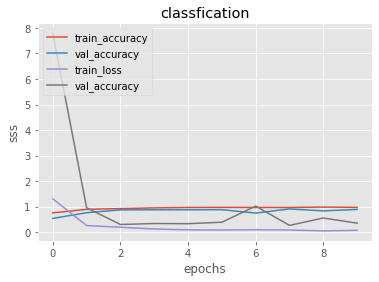

In [11]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
plt.plot(H.history['accuracy'],label='train_accuracy')
plt.plot(H.history['val_accuracy'],label='val_accuracy')
plt.plot(H.history['loss'],label='train_loss')
plt.plot(H.history['val_loss'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('sss')
plt.title('classfication')
plt.legend(loc='upper left')
plt.show()


net.save('smile_net.h5')